In [7]:
# path de las imagenes
image_path1 = "../Material_TPs/TP1/coord_cromaticas"
image_path2 = "../Material_TPs/TP1/white_patch"
image_path3 = "../Material_TPs/TP1"

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt

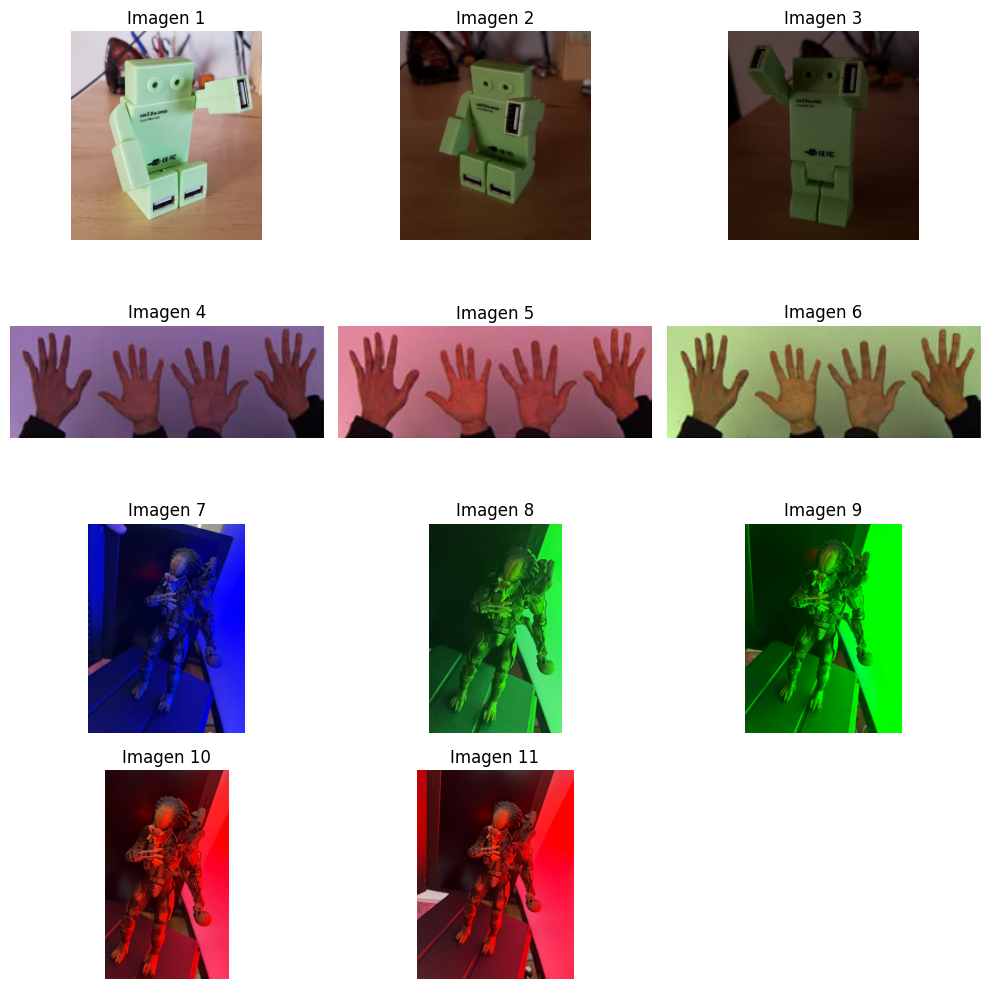

In [3]:
# Guardar las imagenes
img1 = cv.imread(image_path1 + '/CoordCrom_1.png')
img2 = cv.imread(image_path1 + '/CoordCrom_2.png')
img3 = cv.imread(image_path1 + '/CoordCrom_3.png')
img4 = cv.imread(image_path2 + '/test_blue.png')
img5 = cv.imread(image_path2 + '/test_red.png')
img6 = cv.imread(image_path2 + '/test_green.png')
img7 = cv.imread(image_path2 + '/wp_blue.jpg')
img8 = cv.imread(image_path2 + '/wp_green.png')
img9 = cv.imread(image_path2 + '/wp_green2.jpg')
img10 = cv.imread(image_path2 + '/wp_red.png')
img11 = cv.imread(image_path2 + '/wp_red2.jpg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img6 = cv.cvtColor(img6, cv.COLOR_BGR2RGB)
img7 = cv.cvtColor(img7, cv.COLOR_BGR2RGB)
img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)
img9 = cv.cvtColor(img9, cv.COLOR_BGR2RGB)
img10 = cv.cvtColor(img10, cv.COLOR_BGR2RGB)
img10 = cv.cvtColor(img10, cv.COLOR_BGR2RGB)
img10 = cv.cvtColor(img10, cv.COLOR_BGR2RGB)
img11 = cv.cvtColor(img11, cv.COLOR_BGR2RGB)

images = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10, img11]

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(4, 3, i+1)
    plt.title(f"Imagen {i+1}")
    plt.imshow(images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Parte 1
Implementar el algoritmo de pasaje a coordenadas cromaticas para librarnos de las variaciones de constraste.
Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminacion.
Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [4]:
# Implementar el algoritmo de pasaje a coordenadas comaticas para librarnos 
# de las variaciones de constraste.

def coordenadas_cromaticas(img):
    img_float = img.astype(np.float32)

    # separamos los canales
    R = img_float[:,:,0]
    G = img_float[:,:,1]
    B = img_float[:,:,2]
    
    # normalizamos los canales (agregamos un valor pequeño para evitar divisiones por cero)
    e = 1e-3
    R_normalizado = R / (R+G+B+e)
    G_normalizado = G / (R+G+B+e)
    B_normalizado = B / (R+G+B+e)

    img_normalizada = np.dstack((R_normalizado, G_normalizado, B_normalizado))
    return img_normalizada

In [5]:
#Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminacion.

def white_patch(img):
    # convertimos la imagen a float
    img = img.astype(np.float32)
    
    # normalizamos la imagen a [0,1]
    img = img / 255.0

    # calculamos los maximos de cada canal
    canales_max = np.amax(img, axis=(0,1))
    
    # escalar los canales en funcion de su valor maximo
    img = img / canales_max

    # regresamos a enteros
    img = (img * 255).astype(np.uint8)

    # clip para evitar errores
    img = np.clip(img, 0, 255)

    return img



In [6]:
# Una segunda implementacion teniendo en cuenta percentiles, ya que en las imagenes con la 
# pantalla iluminando la figura (con luz roja, verde y azul), los tres canales estan saturados 
# pero si removemos los puntos blancos entonces permite un mejor balanceo de blancos

def white_patch2(img, percentil = 100):
    # convertimos la imagen a float
    img = img.astype(np.float32)
    
    # calculamos los percentiles de cada canal
    canales_percentil = np.percentile(img, percentil, axis=(0,1))

    # escalar los canales en funcion de su valor maximo
    img = img / canales_percentil

    # clip para evitar errores
    img = np.clip(img, 0, 1)

    # regresamos a enteros
    img = (img * 255).astype(np.uint8)
    
    return img


In [7]:
# Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) 
# en el caso de White patch.

images = [img1, img2, img3]

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(3, 2, i*2+1)
    plt.title(f"Imagen Original {i+1}")
    plt.imshow(images[i])
    plt.axis('off')
    
    plt.subplot(3, 2, i*2+2)
    plt.title(f"White Patch  {i+1}")
    plt.imshow(coordenadas_cromaticas(images[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


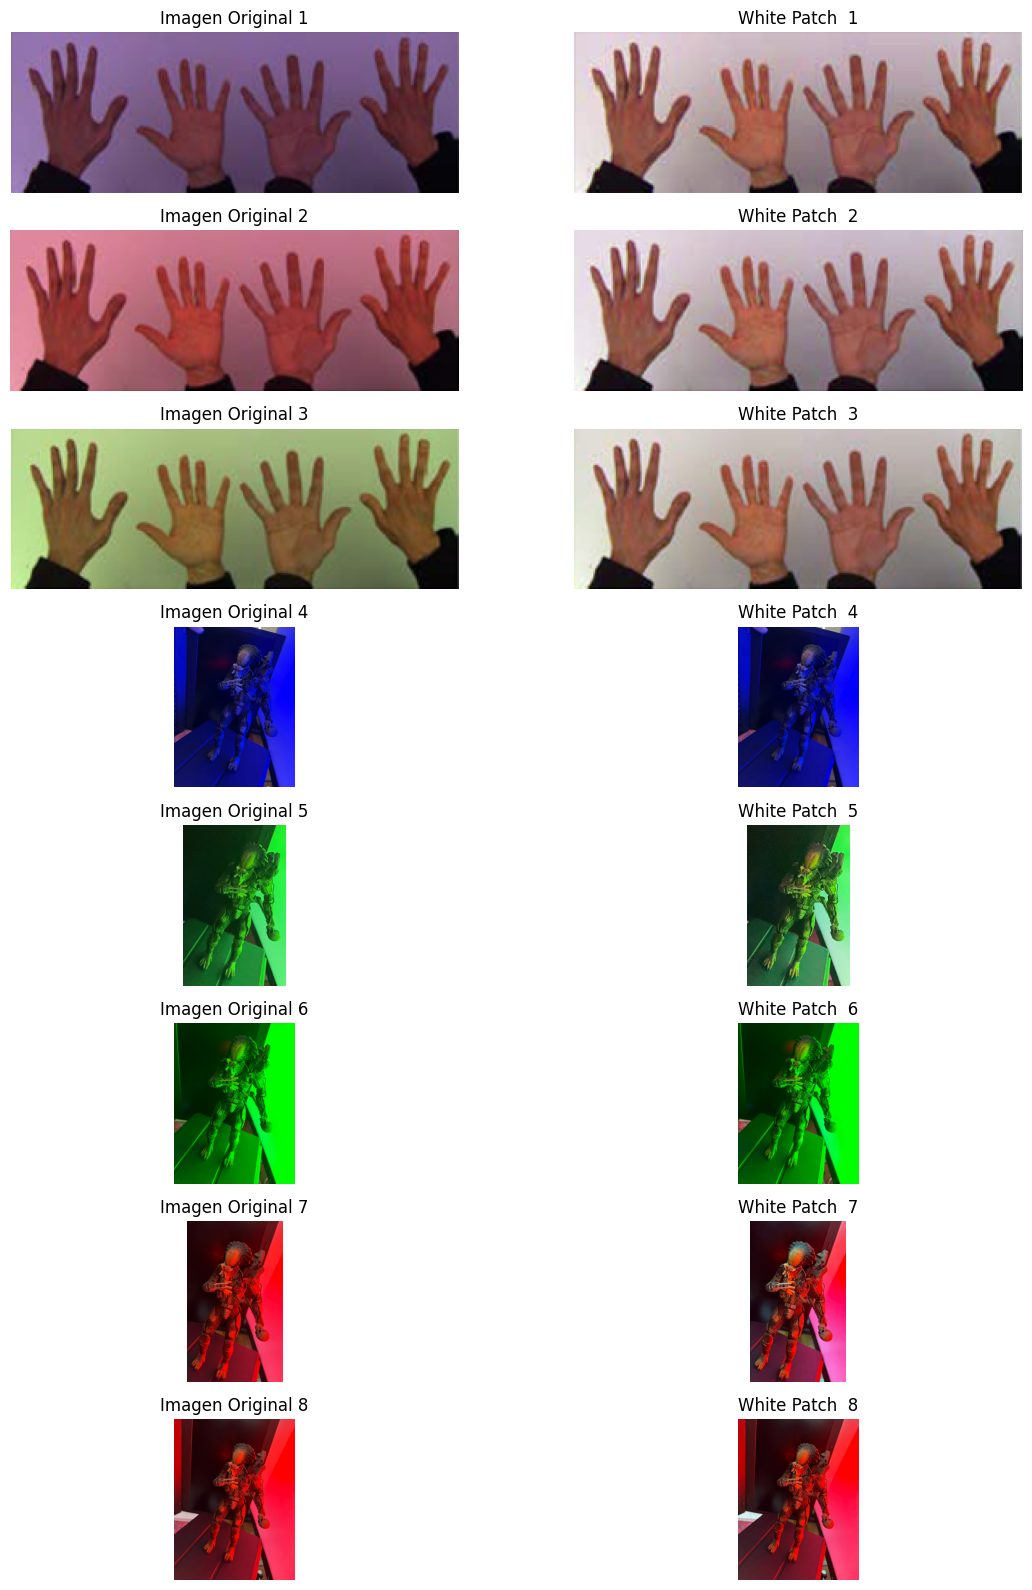

In [8]:
images = [img4, img5, img6, img7, img8, img9, img10, img11]

plt.figure(figsize=(12, 16))
for i in range(len(images)):
    plt.subplot(8, 2, i*2+1)
    plt.title(f"Imagen Original {i+1}")
    plt.imshow(images[i])
    plt.axis('off')
    
    plt.subplot(8, 2, i*2+2)
    plt.title(f"White Patch  {i+1}")
    plt.imshow(white_patch(images[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()


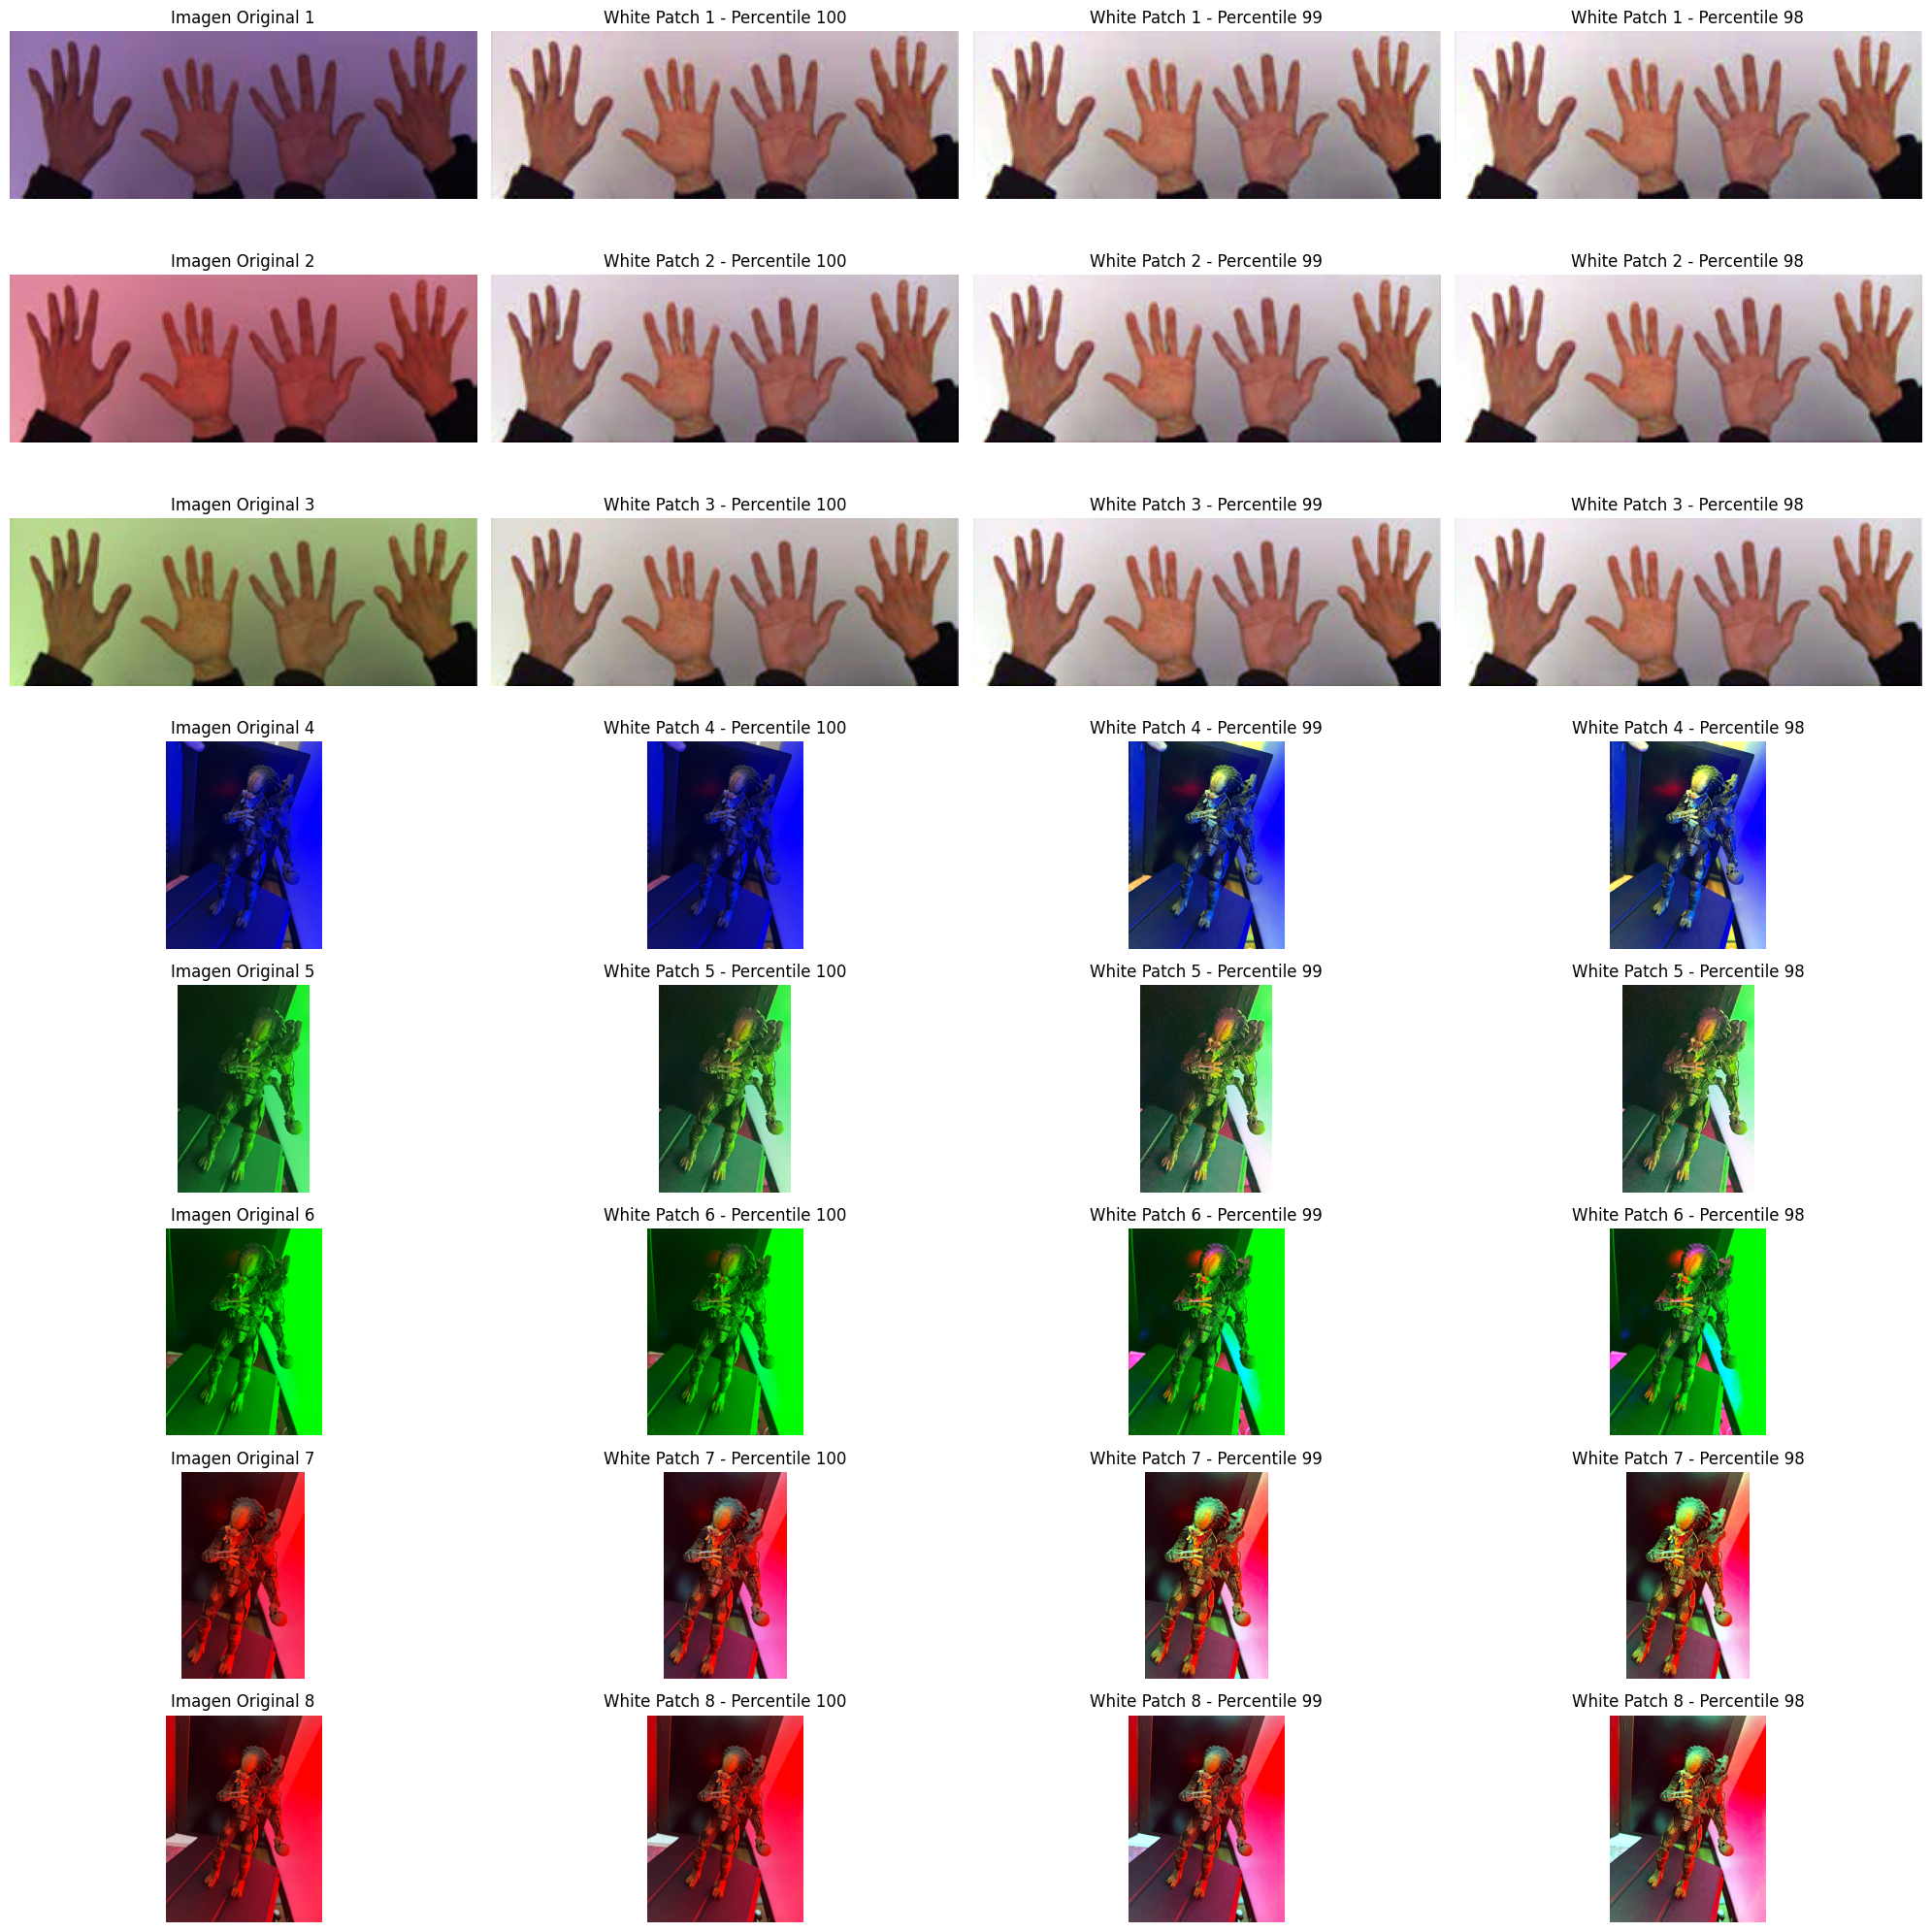

In [9]:
percentiles = [100, 99, 98]

plt.figure(figsize=(20, 20))
for i in range(len(images)):
    plt.subplot(8, 4, i*4+1)
    plt.title(f"Imagen Original {i+1}")
    plt.imshow(images[i])
    plt.axis('off')
    
    for j, percentile in enumerate(percentiles):
        plt.subplot(8, 4, i*4+2+j)
        plt.title(f"White Patch {i+1} - Percentile {percentile}")
        plt.imshow(white_patch2(images[i], [percentile]))
        plt.axis('off')

plt.tight_layout()
plt.show()

El algoritmo de white patch corrige los canales de colores de modo que los pixeles de mayor intensidad se vuelvan blancos. Para esto, se asume que el pixel de mayor intensidad en la imagen es blanco.

El problema surge cuando la asuncion no se cumple, es decir, el pixel de mayor intensidad en la imagen no es blanco. Cuando no se cumple, la aplicacion de white patch puede resultar en cambios de color o la aparicion de artefactos extraños en la imagen.

Se puede ver en los percentiles 99 y 98 que dependiendo del color de la pantalla, la cabeza de la miniatura alienigena cambia a distintos colores (confirmando el cambio de color mencionado anteriormente)

Parte 2
Para las imagenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.
Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificacion/deteccion de imagenes, considera que pueden ser de utilidad tomar como 'features' a los histogramas?
Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imagenes separadas.

In [10]:
%matplotlib inline

In [11]:
# Para las imagenes img1_tp.png y img2_tp.png leerlas con OpenCV en 
# escala de grises y visualizarlas.

img12 = cv.imread(image_path3 + '/img1_tp.png', cv.IMREAD_GRAYSCALE)
img13 = cv.imread(image_path3 + '/img2_tp.png', cv.IMREAD_GRAYSCALE)

cv.imshow('image', img12)
cv.waitKey(0) 
cv.destroyAllWindows()
cv.imshow('image', img13)
cv.waitKey(0) 
cv.destroyAllWindows()

In [12]:
# Elija el numero de bins que crea conveniente y grafique su histograma, 
# compare los histogramas entre si.

bins = [8, 16, 32, 64, 128]
images = [img12, img13]
plt.figure(figsize=(8, 4 * (1 + len(bins))))

for i, image in enumerate(images):
    plt.subplot(6, 2, i+1)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.title(f"Imagen {i+1}")

    for j, num_bins in enumerate(bins):
        j_n = j + 1
        plt.subplot(6, 2, (i+1) + j_n * 2)

        plt.hist(image.flatten(), bins=num_bins, edgecolor="black")

        plt.xlim(0, 255)

        if i+1 == 1:
            plt.ylabel("Frecuencia", rotation=90)

        plt.title(f"Imagen {i+1}: {num_bins} bins")


plt.show()

La imagen 1 parece haber sido obtenida a partir de ordenar los pixeles de la imagen 2 en orden. Por ese motivo, ambos histogramas, independiente de la cantidad de bines, son iguales.

Lo que esto nos dice es que, con la misma distribucion de pixeles se pueden formar infinitas imagenes, por lo que utilizar los bins como features no es suficiente para diferenciar dos imagenes y/u objetos.

In [8]:
# Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos 
# de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, 
# las regiones en imagenes separadas.

img14 = cv.imread(image_path3 + '/segmentacion.png')

cv.imshow('image', img14)
cv.waitKey(0) 
cv.destroyAllWindows()

In [14]:
def obtener_canal_color(i, is_hsv=False):
    if is_hsv:
        channel = "Hue" if i==0 else "Saturation" if i==1 else "Value"
        color = None
    else:
        channel = "B" if i==0 else "G" if i==1 else "R"
        color = "b" if i==0 else "g" if i==1 else "r"

    return (channel, color)

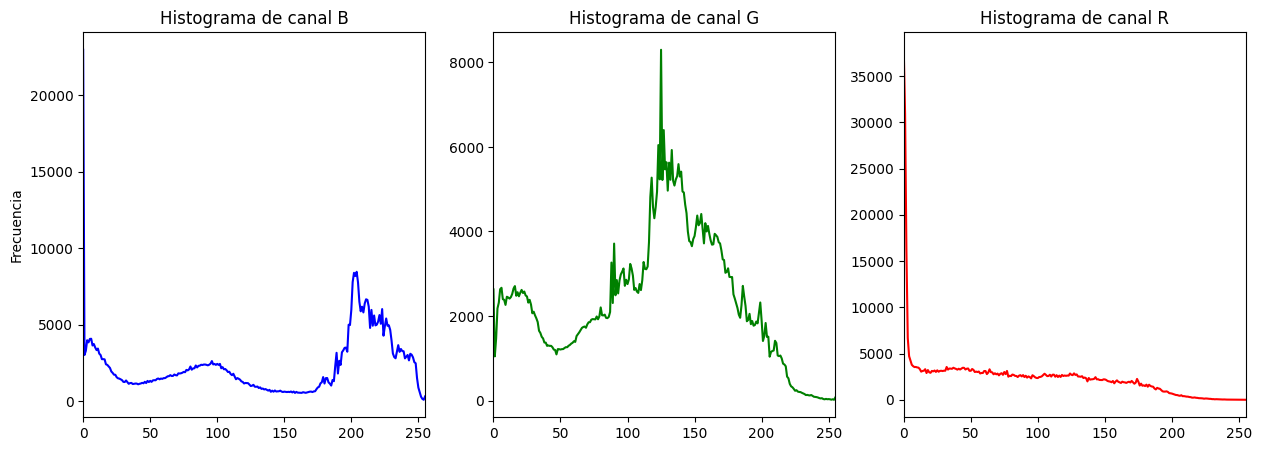

In [15]:
plt.figure(figsize=(15, 5))

for i in range(img14.shape[-1]):
    plt.subplot(1, 3, i + 1)

    canal, color = obtener_canal_color(i)

    hist = cv.calcHist(images=[img14], channels=[i], mask=None, histSize=[256], ranges=[0, 256])

    # plot the above computed histogram
    plt.plot(hist, color=color)
    plt.title(f"Histograma de canal {canal}")

    plt.xlim(0, 255)

    if i == 0:
        plt.ylabel("Frecuencia", rotation=90)

plt.show()

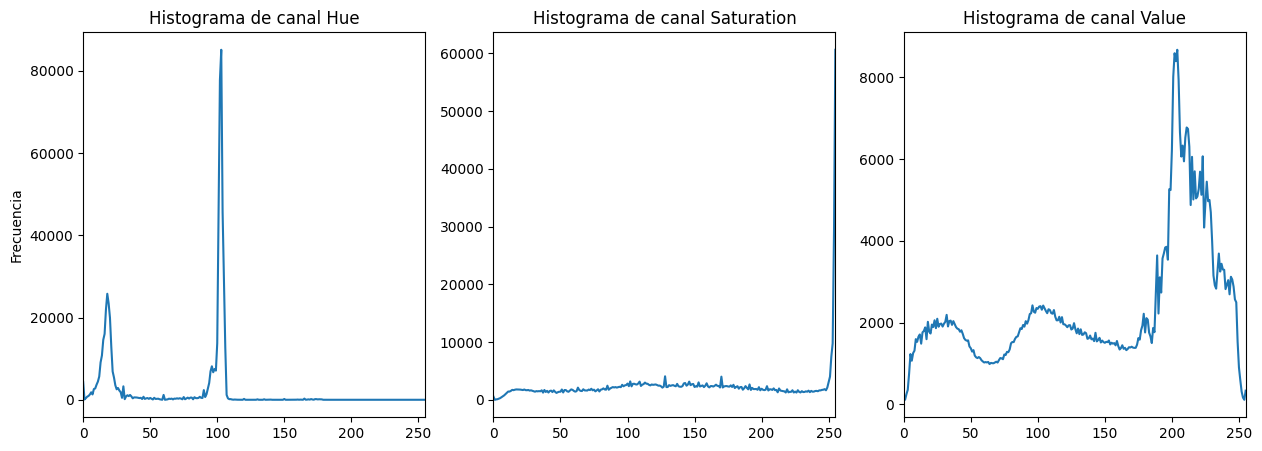

In [16]:
# La imagen a segmentar tiene claros cambios de color, por lo que conviene trabajar en espacio
# HSV donde el canal Hue es responsable unicamente del color

img_hsv = cv.cvtColor(img14, cv.COLOR_BGR2HSV)

plt.figure(figsize=(15, 5))

for i in range(img_hsv.shape[-1]):
    plt.subplot(1, 3, i + 1)

    canal, color = obtener_canal_color(i, True)

    hist = cv.calcHist(images=[img_hsv], channels=[i], mask=None, histSize=[256], ranges=[0, 256])

    # plot the above computed histogram
    plt.plot(hist, color=color)
    plt.title(f"Histograma de canal {canal}")

    plt.xlim(0, 255)

    if i == 0:
        plt.ylabel("Frecuencia", rotation=90)

plt.show()

In [28]:
# La imagen a segmentar tiene claros cambios de color, por lo que conviene trabajar en espacio
# HSV donde el canal Hue es responsable unicamente del color

img_hsv = cv.cvtColor(img14, cv.COLOR_BGR2HSV)

cv.imshow('image',img14)
cv.waitKey(0) 
cv.destroyAllWindows()

In [160]:
# Conseguir una linea vertical de la imagen
middle_column_index = int(img_hsv.shape[1] // 1.2)

# Conseguir los valores de H, S y V de una linea vertical de la imagen
hue_values = img_hsv[:, middle_column_index, 0]
saturation_values = img_hsv[:, middle_column_index, 1]
value_values = img_hsv[:, middle_column_index, 2]

# Mostrar una franja de la imagen alrededor de donde se extrae la linea vertical
middle_column = img_hsv[:, middle_column_index - 10 : middle_column_index + 10, :]

plt.figure(figsize=(11, 10))

plt.subplot(1, 4, 1)
plt.plot(hue_values, range(len(hue_values)), color='r')
plt.title('Hue')
plt.xlabel('Hue')
plt.ylabel('Pixel')
plt.gca().invert_yaxis()

plt.subplot(1, 4, 2)
plt.plot(saturation_values, range(len(saturation_values)), color='g')
plt.title('Saturation')
plt.xlabel('Saturation')
plt.gca().invert_yaxis()

plt.subplot(1, 4, 3)
plt.plot(value_values, range(len(value_values)), color='b')
plt.title('Value')
plt.xlabel('Value')
plt.gca().invert_yaxis()

plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(middle_column, cv.COLOR_HSV2RGB))
plt.title('Columna muestra')
plt.axis('off')
plt.show()

In [36]:
# Definir los rangos de los colores que prevalecen en la imagen
rocas_bajo = np.array([0, 0, 0])
rocas_alto = np.array([27, 255, 255])

cielo_bajo = np.array([95, 40, 170])
cielo_alto = np.array([110, 255, 255])

# Crear mascaras
mascara_roca = cv.inRange(img_hsv, rocas_bajo, rocas_alto)
mascara_cielo = cv.inRange(img_hsv, cielo_bajo, cielo_alto)

# La mascara del oceano es todo lo que no está dentro de la mascara roca y mascara cielo
mascara_oceano = cv.bitwise_and(cv.bitwise_not(mascara_roca), cv.bitwise_not(mascara_cielo))

# Aplicar las mascaras
img_rocas = cv.bitwise_and(img_hsv, img_hsv, mask = mascara_roca)
img_cielo = cv.bitwise_and(img_hsv, img_hsv, mask = mascara_cielo)
img_oceano = cv.bitwise_and(img_hsv, img_hsv, mask = mascara_oceano)

cv.imshow('Rocas', cv.cvtColor(img_rocas, cv.COLOR_HSV2BGR))
cv.imshow('Cielo', cv.cvtColor(img_cielo, cv.COLOR_HSV2BGR))
cv.imshow('Oceano', cv.cvtColor(img_oceano, cv.COLOR_HSV2BGR))
cv.waitKey(0)
cv.destroyAllWindows()

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img14, cv.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img_rocas, cv.COLOR_HSV2RGB))
plt.title('Seccion rocas')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(img_cielo, cv.COLOR_HSV2RGB))
plt.title('Seccion cielo')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(img_oceano, cv.COLOR_HSV2RGB))
plt.title('Seccion oceano')
plt.axis('off')
plt.tight_layout()
plt.show()